In [1]:
import pandas as pd
#set plotly as pandas backend
# pd.set_option('plotting.backend', 'plotly')

In [2]:
#read csv file. ignore the header row columns repeated every row


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq
from scipy.signal import hamming

def load_data(filepath):
    """
    Load data from a CSV file.
    Args:
        filepath (str): The path to the CSV file.
    Returns:
        pandas.DataFrame: Loaded data.
    """
    return pd.read_csv(filepath)

def preprocess_signal(data, column_name):
    """
    Preprocess the signal by applying zero-padding and a window function.
    Args:
        data (pandas.Series): The input signal data.
        column_name (str): The column name for the signal data.
    Returns:
        np.ndarray: Preprocessed signal data.
    """
    # Convert to numpy array
    signal = data[column_name].to_numpy()
    
    # Zero-padding
    zero_padded_signal = np.pad(signal, (0, 10*len(signal)), mode='constant')
    
    # Apply window function
    windowed_signal = zero_padded_signal * hamming(len(zero_padded_signal))
    
    return windowed_signal

def compute_fft(signal, sampling_rate):
    """
    Compute the FFT of a signal.
    Args:
        signal (np.ndarray): The input signal data.
        sampling_rate (float): The sampling rate of the signal.
    Returns:
        (np.ndarray, np.ndarray): Tuple of frequency bins and magnitude of FFT.
    """
    # FFT
    signal_fft = fft(signal)
    frequency = fftfreq(len(signal_fft), 1/sampling_rate)
    
    # Magnitude of the FFT
    magnitude = np.abs(signal_fft)
    
    return frequency, magnitude

def plot_spectrum(frequency, magnitude, title='Frequency Spectrum', xlabel='Frequency (Hz)', ylabel='Magnitude'):
    """
    Plot the frequency spectrum of a signal.
    Args:
        frequency (np.ndarray): Frequency bins.
        magnitude (np.ndarray): Magnitude of the FFT.
        title (str): The title of the plot.
        xlabel (str): Label for the x-axis.
        ylabel (str): Label for the y-axis.
    """
    plt.figure(figsize=(12, 6))
    plt.plot(frequency[:len(magnitude)//2], magnitude[:len(magnitude)//2])
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid(True)
    plt.show()



In [3]:
%matplotlib widget

/tmp/ipykernel_112998/986782924.py:33: DeprecationWarning: Importing hamming from 'scipy.signal' is deprecated since SciPy 1.1.0 and will raise an error in SciPy 1.13.0. Please use 'scipy.signal.windows.hamming' or the convenience function 'scipy.signal.get_window' instead.
  windowed_signal = zero_padded_signal * hamming(len(zero_padded_signal))


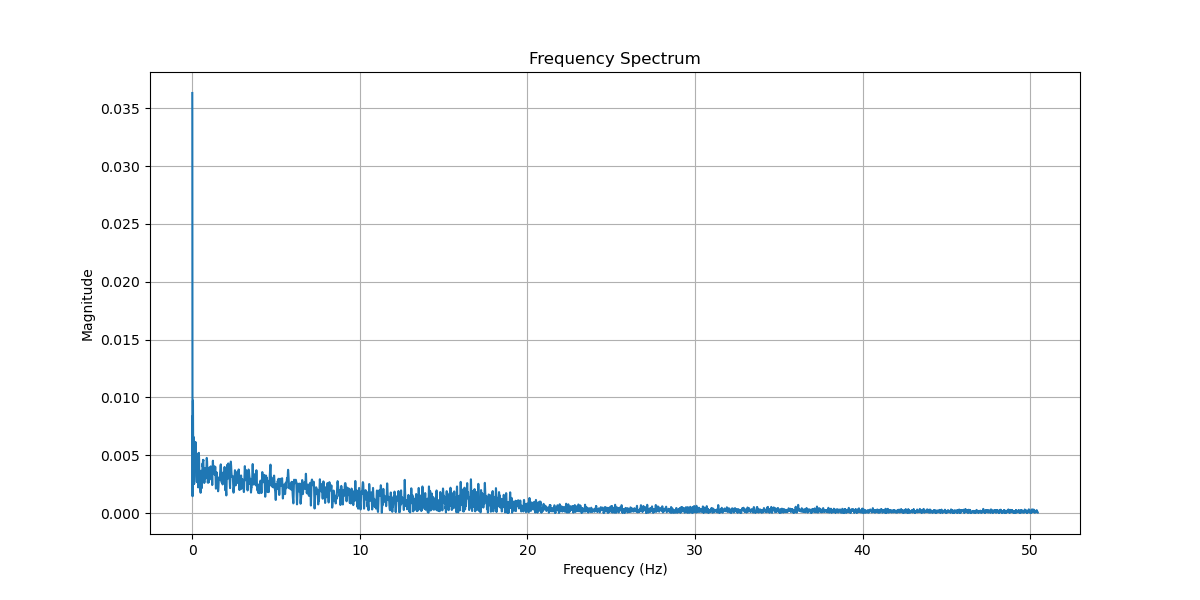

In [4]:
# Main execution block

# Load the data
data = load_data('~/impulse3.csv')

# Process the signal
processed_signal = preprocess_signal(data, '/x')

# Estimate the sampling rate
sampling_rate = 1 / np.mean(np.diff(data['__time']))

# Compute the FFT
freq, mag = compute_fft(processed_signal, sampling_rate)

# Plot the spectrum for the full range
plot_spectrum(freq, mag)


In [6]:
from scipy.signal import welch

def remove_dc_offset(signal):
    """ Remove DC offset from a signal """
    return signal - np.mean(signal)

def spectral_analysis_welch(data, channel_names, sampling_rate, nperseg=None):
    """
    Perform spectral analysis using Welch's method to estimate the power spectral density.
    """
    plt.figure(figsize=(15, 12))
    
    for i, channel in enumerate(channel_names, 1):
        # Remove DC offset
        signal_no_dc = remove_dc_offset(data[channel])
        
        # Apply a window and compute the Welch's power spectral density estimate
        freqs, psd = welch(signal_no_dc, fs=sampling_rate, window='hamming', nperseg=nperseg, scaling='density')
        
        # Plot each channel in a subplot
        plt.subplot(len(channel_names), 1, i)
        plt.semilogy(freqs, psd)  # Use a logarithmic scale for the y-axis
        plt.title(f'Power Spectral Density of {channel}')
        plt.xlabel('Frequency (Hz)')
        plt.ylabel('PSD (Power/Frequency)')
        plt.grid(True)
        plt.tight_layout()
    
    plt.show()

# Specify the number of points used in each segment of Welch's method
nperseg_welch = len(new_data) // 8  # Reduce this number if the resolution is too low

# Perform spectral analysis using Welch's method on all channels
spectral_analysis_welch(new_data, channels_new_data, sampling_rate_new, nperseg=nperseg_welch)


NameError: name 'new_data' is not defined

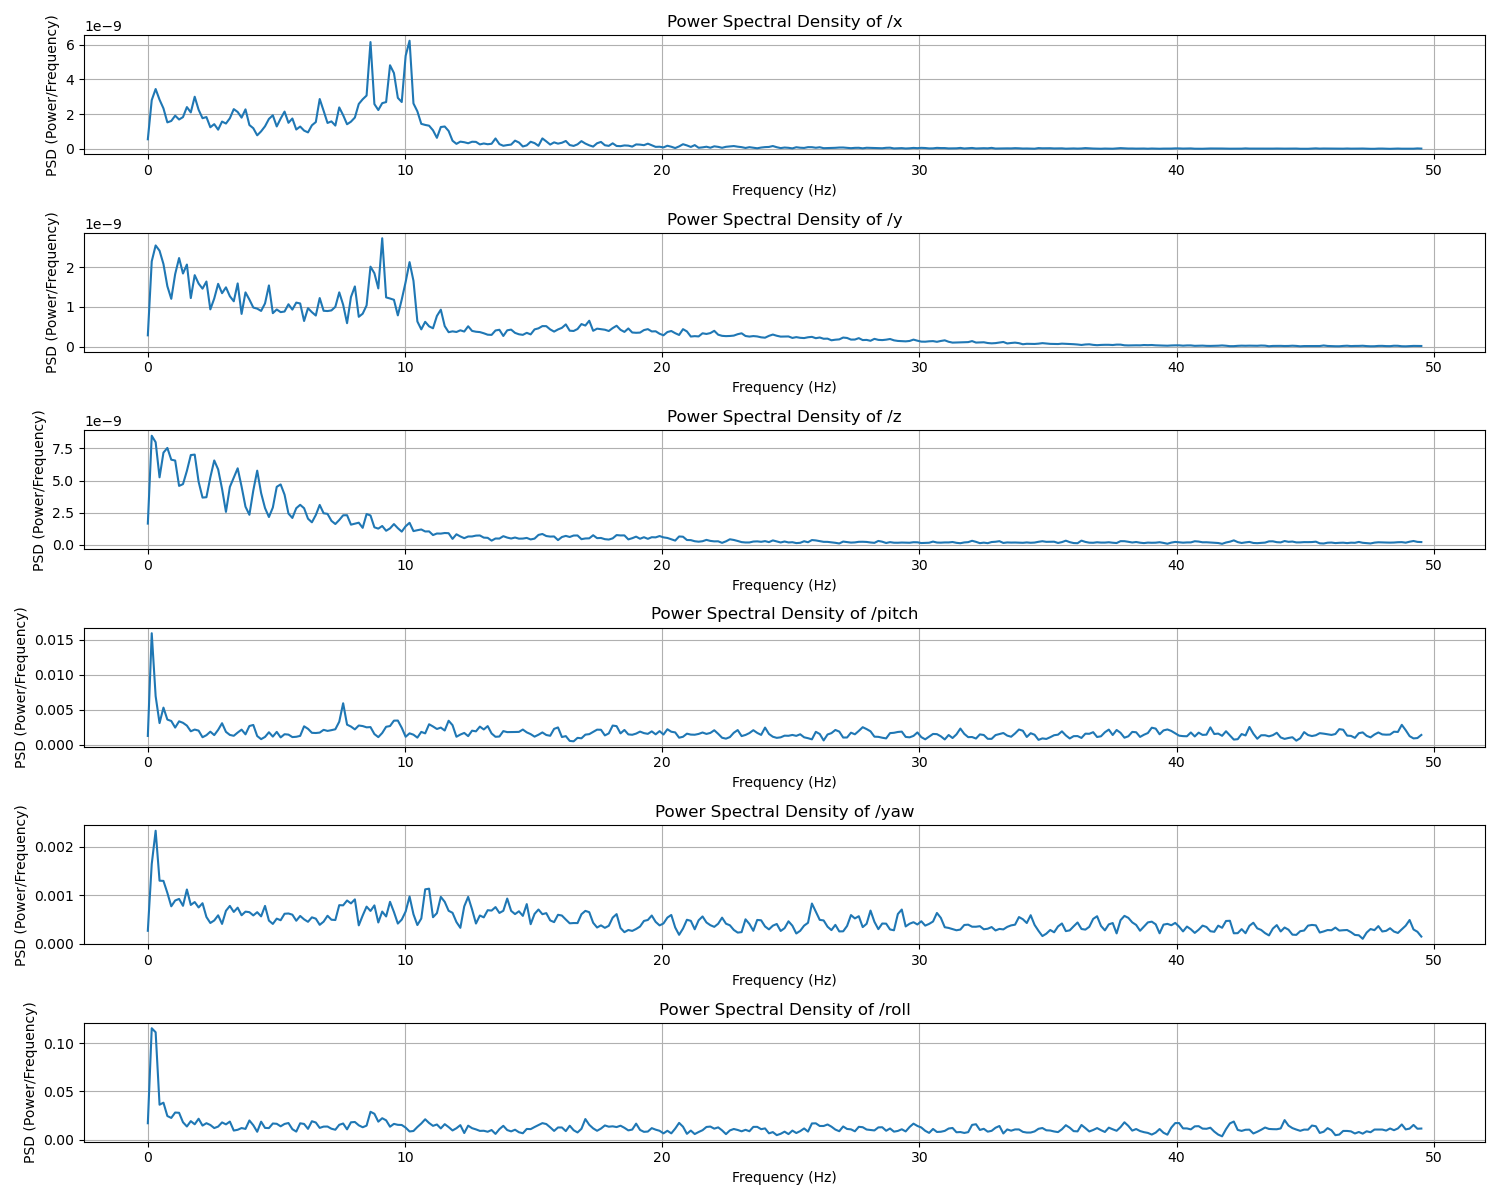

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import welch, hamming

def load_data(filepath):
    """
    Load data from a CSV file.
    Args:
        filepath (str): The path to the CSV file.
    Returns:
        pandas.DataFrame: Loaded data.
    """
    return pd.read_csv(filepath)

def remove_dc_offset(signal):
    """
    Remove the DC offset from the signal.
    Args:
        signal (np.ndarray): The input signal.
    Returns:
        np.ndarray: Signal with the DC offset removed.
    """
    return signal - np.mean(signal)

def spectral_analysis_welch(data, channel_names, sampling_rate, nperseg=None):
    """
    Perform spectral analysis using Welch's method.
    Args:
        data (pandas.DataFrame): DataFrame containing the signals.
        channel_names (list): List of channel names to analyze.
        sampling_rate (float): The sampling rate of the data.
        nperseg (int): Number of points in each segment for Welch's method.
    """
    plt.figure(figsize=(15, 12))
    
    for i, channel in enumerate(channel_names):
        # Remove DC offset
        signal_no_dc = remove_dc_offset(data[channel])
        
        # Compute the Welch's power spectral density estimate
        freqs, psd = welch(signal_no_dc, fs=sampling_rate, window='hamming', nperseg=nperseg, scaling='density')
        
        #normalize the PSD to area = 1
        # psd = psd / np.sum(psd)

        # Plot the PSD
        plt.subplot(len(channel_names), 1, i + 1)
        plt.plot(freqs, psd)
        # plt.semilogy(freqs, psd)

        plt.title(f'Power Spectral Density of {channel}')
        plt.xlabel('Frequency (Hz)')
        plt.ylabel('PSD (Power/Frequency)')
        plt.grid(True)
    
    plt.tight_layout()
    plt.show()

# Load the data
filepath = '~/impulse4.csv'  # Replace with your actual file path
data = load_data(filepath)

# Define the channel names, sorted as requested
channels = ['/x', '/y', '/z', '/pitch', '/yaw', '/roll']

# Estimate the sampling rate
sampling_rate = 1 / np.mean(np.diff(data['__time']))

# Specify the number of points used in each segment for Welch's method
nperseg_welch = len(data) // 8

# Perform spectral analysis using Welch's method
spectral_analysis_welch(data, channels, sampling_rate, nperseg=nperseg_welch)


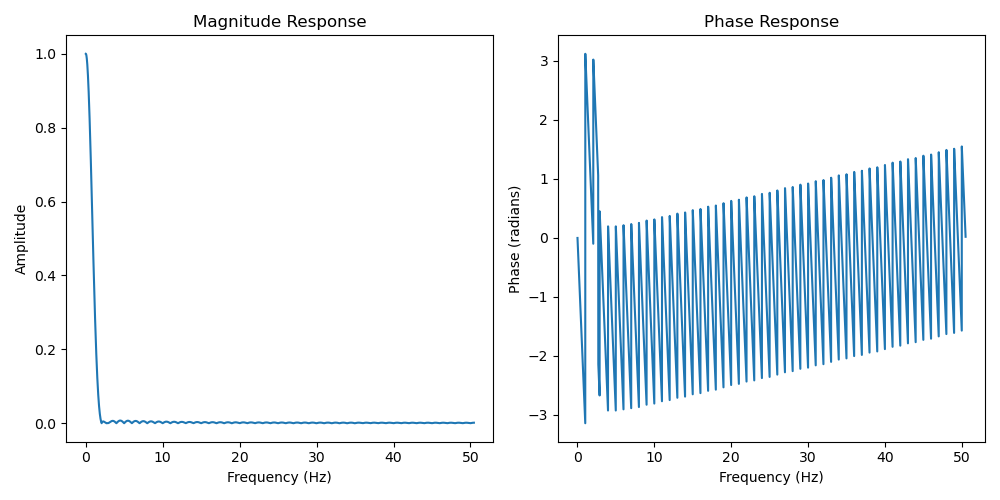

In [12]:


# Extract the 'x' channel data
x_data = data['/y']

# Number of taps in the FIR filter
numtaps = 101
cutoff_hz = 0.1  # example cutoff frequency in Hz

# Sampling rate estimation (assuming the time is in seconds and regularly sampled)
sampling_rate = 1 / np.mean(np.diff(data['__time']))

from scipy.signal import firwin, freqz

# Design a low-pass FIR filter
fir_coeff = firwin(numtaps, cutoff_hz, fs=sampling_rate, window='hamming')

# Frequency response of the FIR filter
freq, response = freqz(fir_coeff, worN=8000, fs=sampling_rate)

# Plotting the frequency response
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(freq, np.abs(response))
plt.title('Magnitude Response')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')

plt.subplot(1, 2, 2)
plt.plot(freq, np.angle(response))
plt.title('Phase Response')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Phase (radians)')

plt.tight_layout()
plt.show()


In [22]:
pd.read_csv('2022-09-20 20:12:30_arucotagData.csv')


,Arucotag time,x1,y1,z1,roll1,pitch1,yaw1,x2,y2,z2,roll2,pitch2,yaw2,x,y,z,roll,pitch,yaw,expW
0,3.585604,-1.000000,-1.000000,-1.000000,-1.000376,-1.000169,-1.003694,25.949813,33.474481,-116.232973,11.363931,-34.205681,135.368909,-1.000188,-1.000085,-1.001847,18.656872,-0.365600,9.567968,0.2
1,3.619125,-0.999588,-1.001723,-1.007373,-1.000388,-1.001235,-1.003721,20.599535,26.551482,-93.087905,9.125500,-27.197267,108.207959,-0.999988,-1.001479,-1.005547,14.862518,-0.322893,7.560027,0.2
2,3.790705,-0.999621,-1.002277,-1.005600,-1.000013,-1.001073,-1.000025,16.226806,21.085829,-74.632840,7.326437,-21.752970,86.545278,-0.999817,-1.001675,-1.002812,11.776621,-0.333570,5.956219,0.2
3,4.122860,-0.998747,-1.003758,-1.009879,-1.000388,-1.001235,-1.003721,12.749117,16.761344,-59.894046,5.895504,-17.235099,69.149054,-0.999568,-1.002496,-1.006800,9.322311,-0.236878,4.627504,0.2
4,4.188392,-0.998747,-1.003758,-1.009879,-0.999746,-1.001082,-0.999987,9.966966,13.301755,-48.103011,4.636604,-13.697196,55.321059,-0.999247,-1.002420,-1.004933,7.301785,-0.197720,3.609024,0.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220,41.090798,-0.999355,-1.002961,-1.004393,-1.001213,-1.002336,-1.003861,-3.401817,-1.331365,-1.491186,-0.013212,0.524157,-0.683807,-1.000284,-1.002648,-1.004127,-1.707515,-0.403604,-1.087496,0.2
221,41.156968,-0.999952,-1.003105,-1.001878,-1.001456,-1.002307,-1.003723,-3.161594,-1.311091,-1.308083,0.043214,0.609785,-0.650555,-1.000704,-1.002706,-1.002800,-1.559190,-0.350653,-0.979319,0.2
222,41.395145,-0.999850,-1.004196,-1.007147,-1.000939,-1.002309,-1.003796,-3.082505,-1.343287,-1.261763,0.083165,0.666542,-0.616724,-1.000394,-1.003253,-1.005471,-1.499670,-0.338372,-0.939243,0.2
223,41.460175,-0.999316,-1.004157,-1.006901,-1.001213,-1.002336,-1.003861,-3.019083,-1.382472,-1.223922,0.045827,0.631124,-0.620390,-1.000264,-1.003247,-1.005381,-1.486628,-0.375674,-0.922156,0.2


In [97]:
import glob

In [98]:
#read csv and use arucotag time col which is unix time as time index 
# df = pd.read_csv('/home/subha/src/ft/2022-09-20 18:18:36_arucotagData.csv',index_col='Arucotag time')
# df = pd.read_csv('2022-09-20 18:25:02_arucotagData.csv',index_col='Arucotag time')
# df = pd.read_csv('2022-09-21 12:47:45_arucotagData.csv',index_col='Arucotag time')

fns = sorted(glob.glob('*.csv'))
df = pd.read_csv(fns[-1],index_col='Arucotag time')

s= pd.Series(df.index).diff()
s.hist(nbins=100).show()
1/s.median()


42.25658385218003

In [99]:
df.iloc[100:].plot()

In [74]:
1/.008

125.0